Shape of X: (100, 2)
Shape of y: (100,)


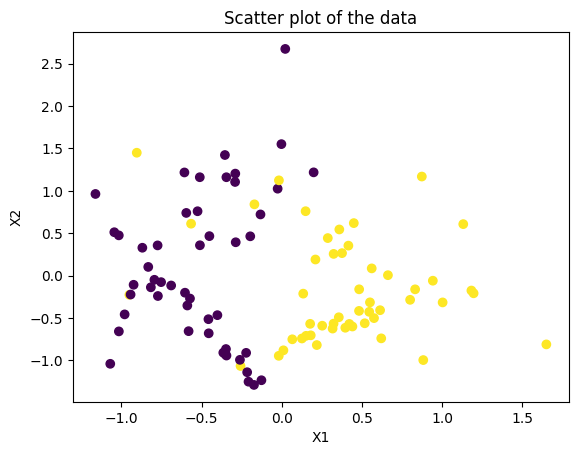

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# For plotting
plt.title('Scatter plot of the data')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Write the code for Q2 a) and b) below. Show your results.



Q2 a) Show the usage of your decision tree on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset. [0.5 mark]

In [2]:
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
y_series = pd.Series(y)

# Splitting the data into training and testing data
split = int(0.7 * X.shape[0])
X_train, X_test = X_df.iloc[:split], X_df.iloc[split:]
y_train, y_test = y_series.iloc[:split], y_series.iloc[split:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 2)
Shape of X_test: (30, 2)
Shape of y_train: (70,)
Shape of y_test: (30,)


In [3]:
# Training the model
model = DecisionTree(criterion='information_gain', max_depth=5)
model.fit(X_train, y_train)

# Predicting the values
y_pred = model.predict(X_test)

print("Criteria :", "Information Gain")
print("Accuracy :", accuracy(y_test, y_pred))
for cls in np.unique(y_test):
    print(f"Precision for class {cls} :", precision(y_test, y_pred, cls))
    print(f"Recall for class {cls} :", recall(y_test, y_pred, cls))

Criteria : Information Gain
Accuracy : 0.8666666666666667
Precision for class 0 : 0.75
Recall for class 0 : 0.9
Precision for class 1 : 0.9444444444444444
Recall for class 1 : 0.85


Q2 b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree. [1 mark]